<h1><strong>CSCI 5455 &ndash; Fall 2022</strong></h1>

<h2><strong>Assignment 4 - Cluster Analysis</strong></h2>


<h3><strong>FirstName_LastName</strong><span style="color:#cc3300;"></h3>

<h2><strong>Assignment Objectives</strong></h2>
<li style="text-align: justify;">1. To implement the <span style="color: #339966;"><strong>DBScan</strong></span> algorithm and test it under different configurations</li>
<li style="text-align: justify;">2. To evaluate the quality of the clusterings</li>
<li style="text-align: justify;">3. To visualize clusterings</li>

<h2>Dataset</h2>

<p style="text-align: justify;">In this assignment, three datasets with different shapes and numbers of clusters are provided. Each dataset contains 1500 samples, and each sample has two dimensions (x and y).
</p>

<h2>Implementation</h2>



In [82]:
import matplotlib.pyplot as plt   # for data visualization
import numpy as np
import math
import time
import pandas as pd               # for data manipulation



dataset_name = 'circles.csv'    # dataset_name: this is the dataset name (such as moons.csv). Assume the dataset is located in the same folder as your notebook.
min_points = []   # a list of integers indicating the minimum number of points required in the neighborhood of a core object
epsilons = []      # a list of floats for neighborhood radius        


<h2>Implement the DBScan  Algorithm (30 Points)</h2>

<p style="text-align: justify;">Implemented DBScan algorithm.
</p>

In [83]:
import math
import time
import matplotlib.pyplot as plt


from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN                             # for building a clustering model
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler               # for feature scaling
from sklearn import datasets
from sklearn import metrics                                    # for calculating Silhouette score


#read the .csv file into variabe dataframe
dataset = pd.read_csv('aniso.csv', encoding='utf-8')   
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values 

#y = dataset.iloc[:,-1].values  

dataset.shape

# Print dataframe
dataset



,-3.375615417734463719e+00,3.632363144292078072e+00
0,-3.618828,3.786279
1,-3.485530,0.464121
2,-2.422184,2.101777
3,-2.127235,2.142973
4,0.656798,-0.351245
...,...,...
1494,-2.425565,-0.265186
1495,-2.817634,3.197943
1496,1.179628,-1.542625
1497,-0.497381,0.782278


In [84]:
#Determine centroids
centers = [[0.5, 2], [-1, -1], [1.5, -1]]

#Normalize the values

dataset, y_true = make_blobs(n_samples=1499, centers=centers,
                cluster_std=0.50, random_state=0)

dataset = StandardScaler().fit_transform(dataset)

In [85]:
"""
Implement the DBScan algorithm, as discussed in the lecture notes.
You need a function named dbscan that takes three arguments (dataset, epsilon, and min_points) and returns a clustering.
"""

def dbscan(dataset, epsilon, min_points):
    eps = epsilon
    min_samples = min_points
     
    
    """
    @min_samples: minimum number of neighbpurnig points for clustering.
    @eps: Epsilon neighborhood radius

    to find optimal value of eps, we'll construct a plot of distances of minimum samples nearest neighbors
    nad look for a pronounced bend
    """
    # Compute DBSCAN
    clustering = DBSCAN(eps = epsilon, min_samples = min_points).fit(dataset)
    core_samples = clustering.core_sample_indices_   
    core_samples_mask = np.zeros_like(clustering.labels_,dtype=bool)   
    core_samples_mask[clustering.core_sample_indices_] = True
    
    return clustering.labels_


In [86]:
#function call
labels = dbscan(dataset, 0.2, 12)
print(labels)
# Number of clusters in labels 
# ignoring noise if present.

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

S_coeff_ = metrics.silhouette_score(dataset, labels)

[0 0 0 ... 1 2 1]


<h2>Clustering Visualization (10 Points)</h2>

<p style="text-align: justify;">Use matplotlib to visualize the cluster. Distinguish each cluster with a different color. Use black to display the outlier points.
</p>


--- 0.06099987030029297 seconds ---


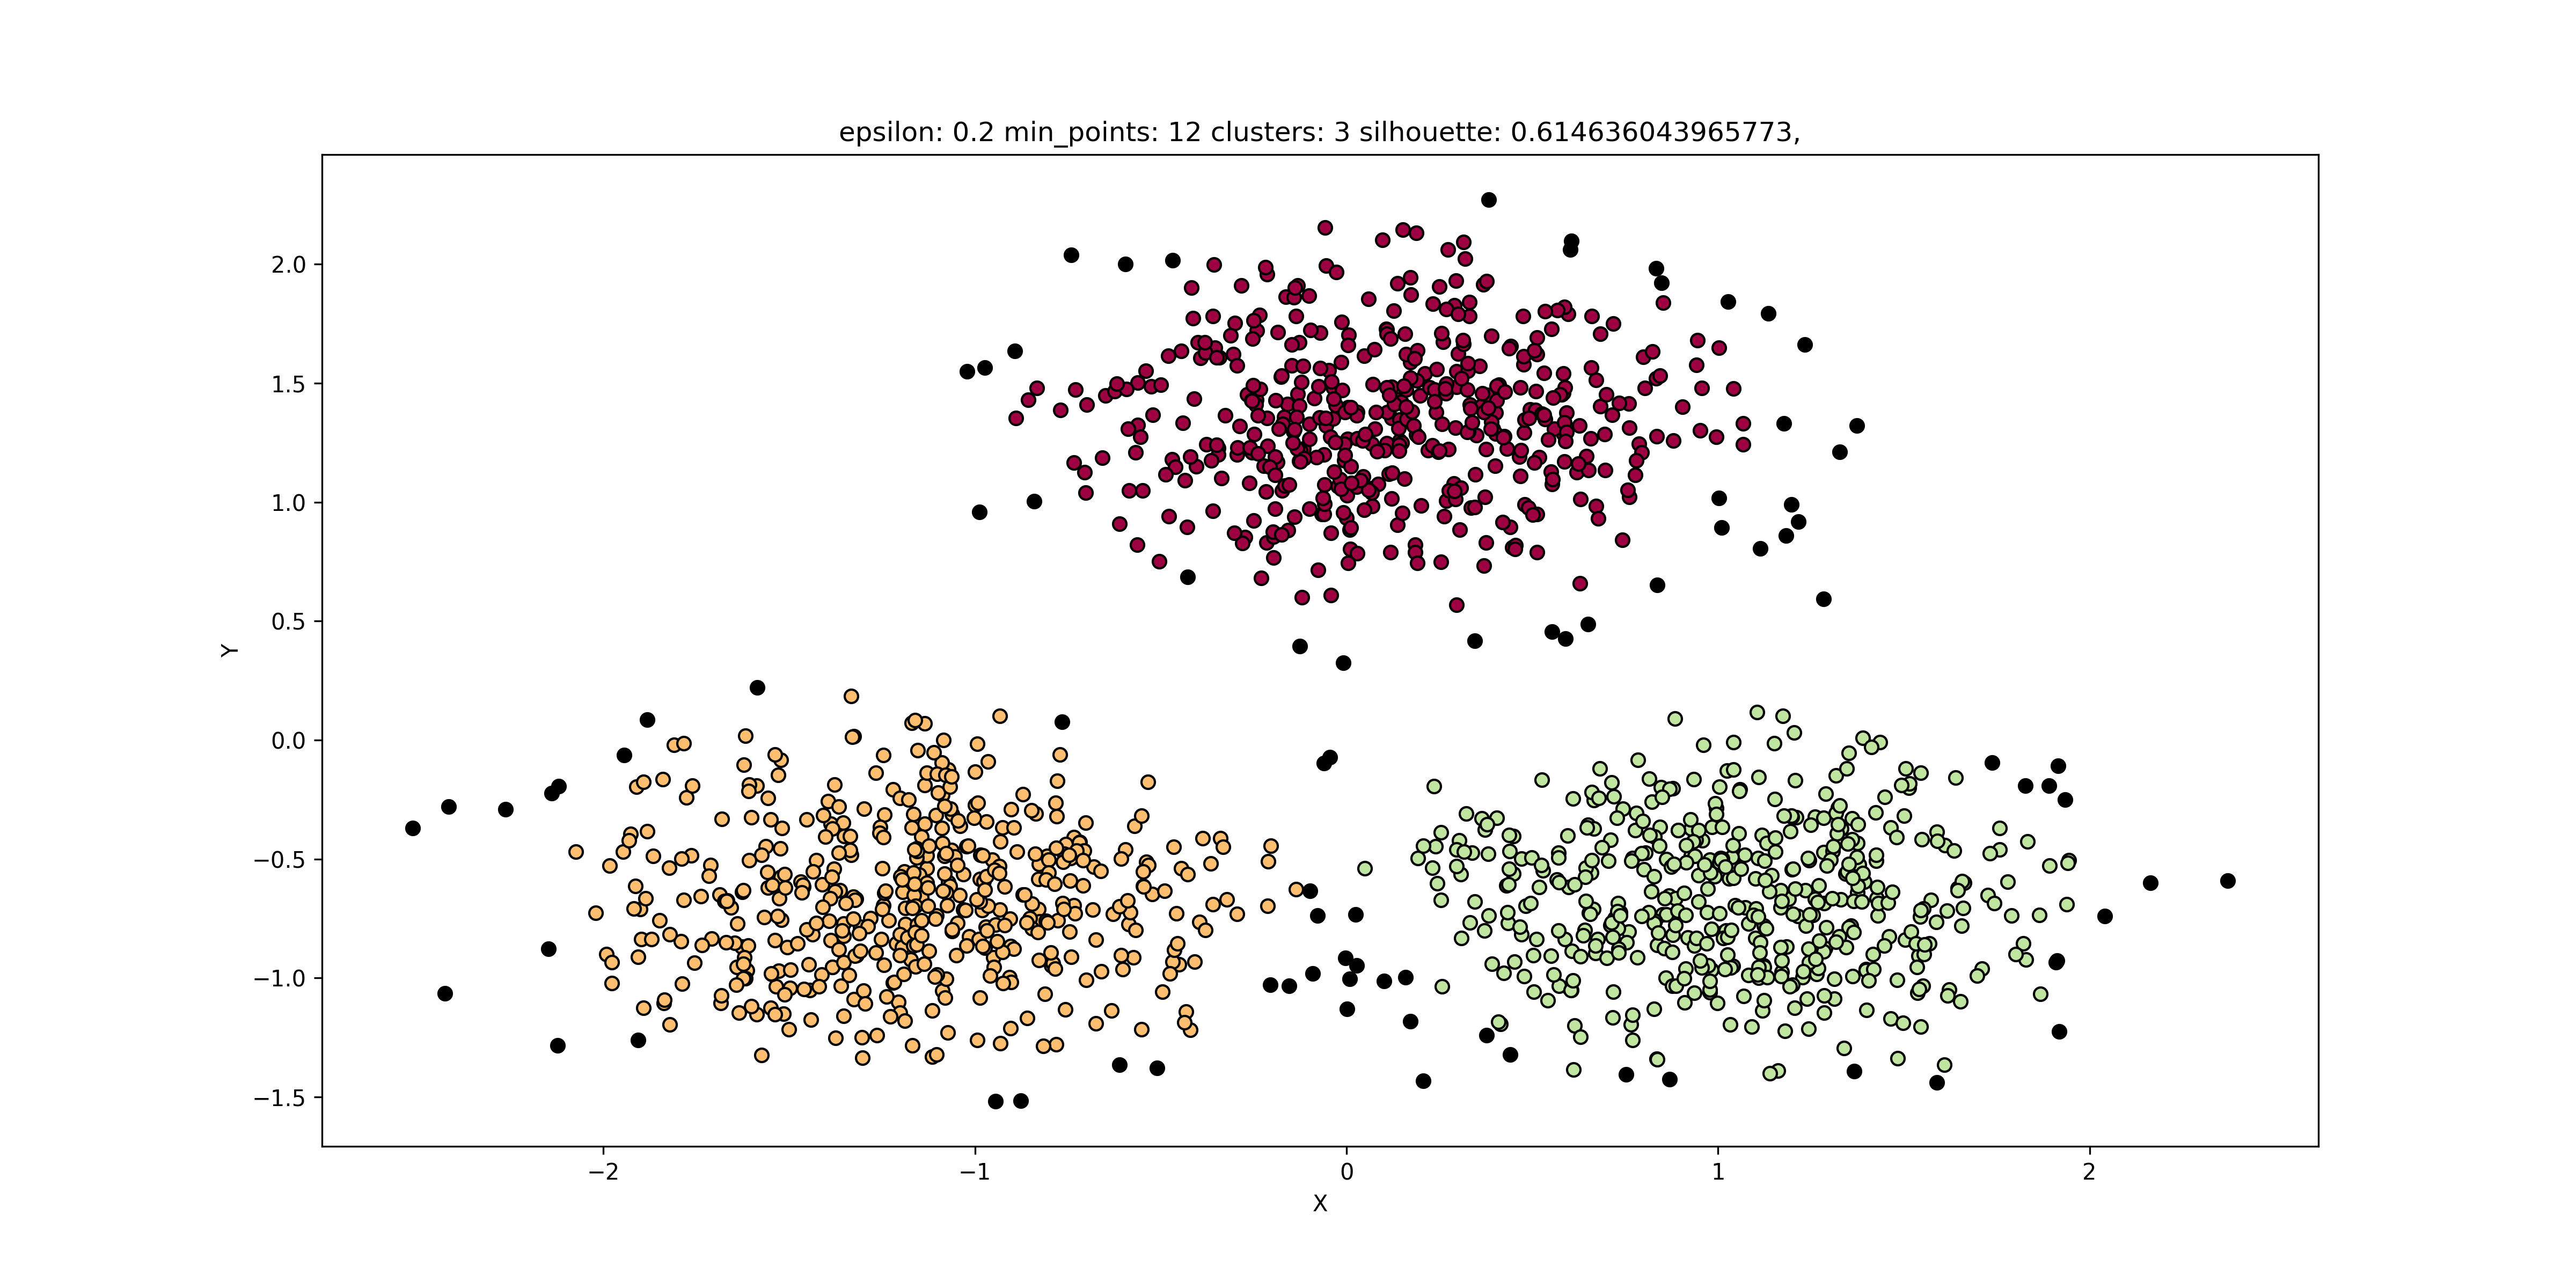

In [87]:
# Matplotlib is used to visualize the cluster.
# clustering data
# Black removed and is used for noise instead.
# Plot result

start_time = time.time()

# Black removed and is used for outliers instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:

        # Black used for outlies and noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = dataset[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        'o',
        markerfacecolor=tuple(col),
        markeredgecolor='k', 
        markersize=14
    )

    xy = dataset[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0], 
        xy[:, 1], 
        'o', 
        markerfacecolor=tuple(col),
        markeredgecolor='k', 
        markersize=6
    )
eps = 0.2
min_samples = 12
print("--- %s seconds ---" % (time.time() - start_time))

#plt.figure(figsize=(16,8), dpi=300)
plt.title(f"epsilon: {eps} min_points: {min_samples} clusters: {n_clusters_} silhouette: {S_coeff_},")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


<h2>Clustering Evaluation and Parameter Tuning (45 Points)</h2>


   <h2> Parameter sets for the circles dataset:</h2>
 

    •	dataset_name = circles.csv'
    •	min_points = [12, 24, 48, 96]
    •	epsilons = [0.1, 0.2, 0.3]


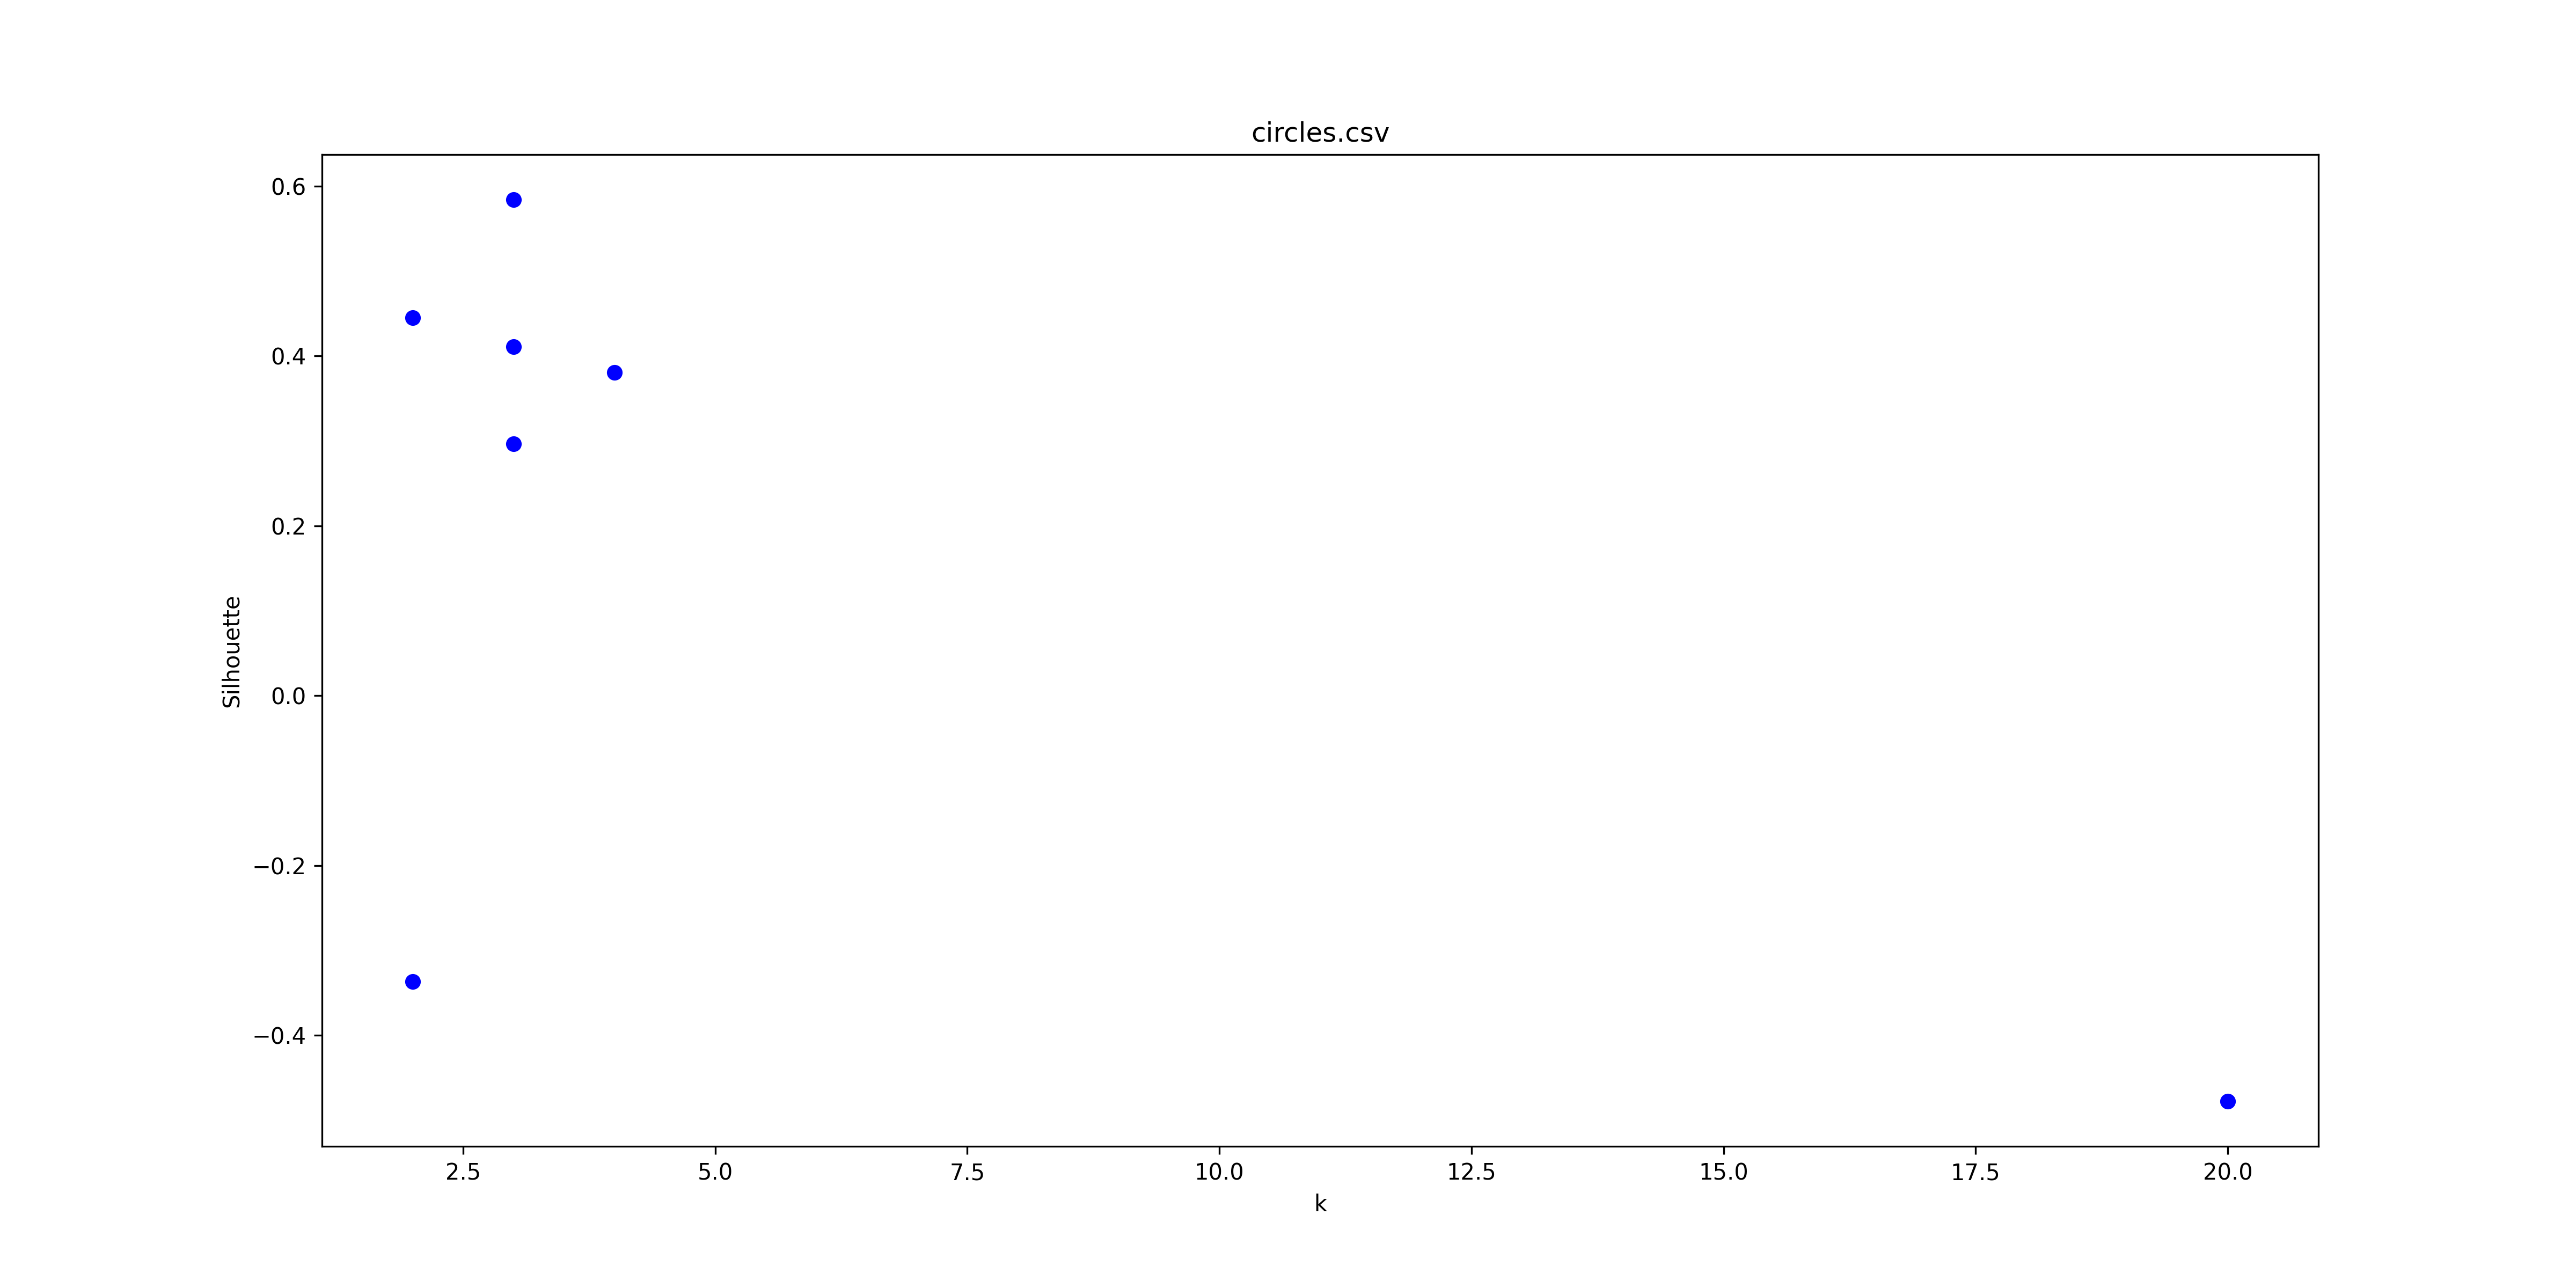

In [88]:
'''Parameter sets for the circles dataset:'''
dataset_name = 'circles.csv'
min_points = [12, 24, 48, 96]
epsilons = [0.1, 0.2, 0.3]

# implement the silhouette measure from scratch to evaluate quality of each clustering.
# Create empty lists
s_scores=[]                         # this is to store Silhouette scores
k=[]                                # this is to store the number of clusters

#read date from .csv file
df = pd.read_csv('circles.csv', encoding='utf-8')

#Determine centroids
centers = [[0.5, 2], [-1, -1], [1.5, -1]]
    
#Normalize the values
df = StandardScaler().fit_transform(df)

df, y_true = make_blobs(n_samples=1499, centers=centers,
                cluster_std=0.50, random_state=0)

for epsilon in epsilons:
    for min_point in min_points:
        #Set the model and its parameters
        # generate clustering for epsilon and min_points and visualize
        #Fit the model
        
        dataset = DBSCAN(eps=epsilon, min_samples=min_point).fit(df)
        
        core_samples = dataset.core_sample_indices_   
        core_samples_mask = np.zeros_like(dataset.labels_,dtype=bool)   
        core_samples_mask[dataset.core_sample_indices_] = True
        
        labels = dataset.labels_
        
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        
        while n_clusters_ >= 2:                                                              # x-axis: k (for k>=2)
             k.append(n_clusters_)                                                           # axis values for the graph
                
             s_scores.append(metrics.silhouette_score(df, labels, metric='euclidean'))       #Calculate Silhoutte Score and append to a list

             break
        
        

'''Plot the resulting Silhouette scores on a graph'''
plt.figure(figsize=(16,8), dpi=300)
plt.plot(k, s_scores, 'o', color='blue')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title(dataset_name)
plt.show()

<p>The best number of clusters (k) for this plot is 3 </p>

<p>This is because when the number of clusters (k) = 3, the average silhouette is at its maximum. </p>


<p>The Silhouette plot suggests the same (k) because from the plot the maximum average silhouette is when we have 3 as the number of clusters (k)</p>


   <h2> Parameter sets for the aniso dataset:</h2>

    •	dataset_name = 'aniso.csv'
    •	min_points = [12, 24, 48, 96]
    •	epsilons = [0.2, 0.3, 0.5]


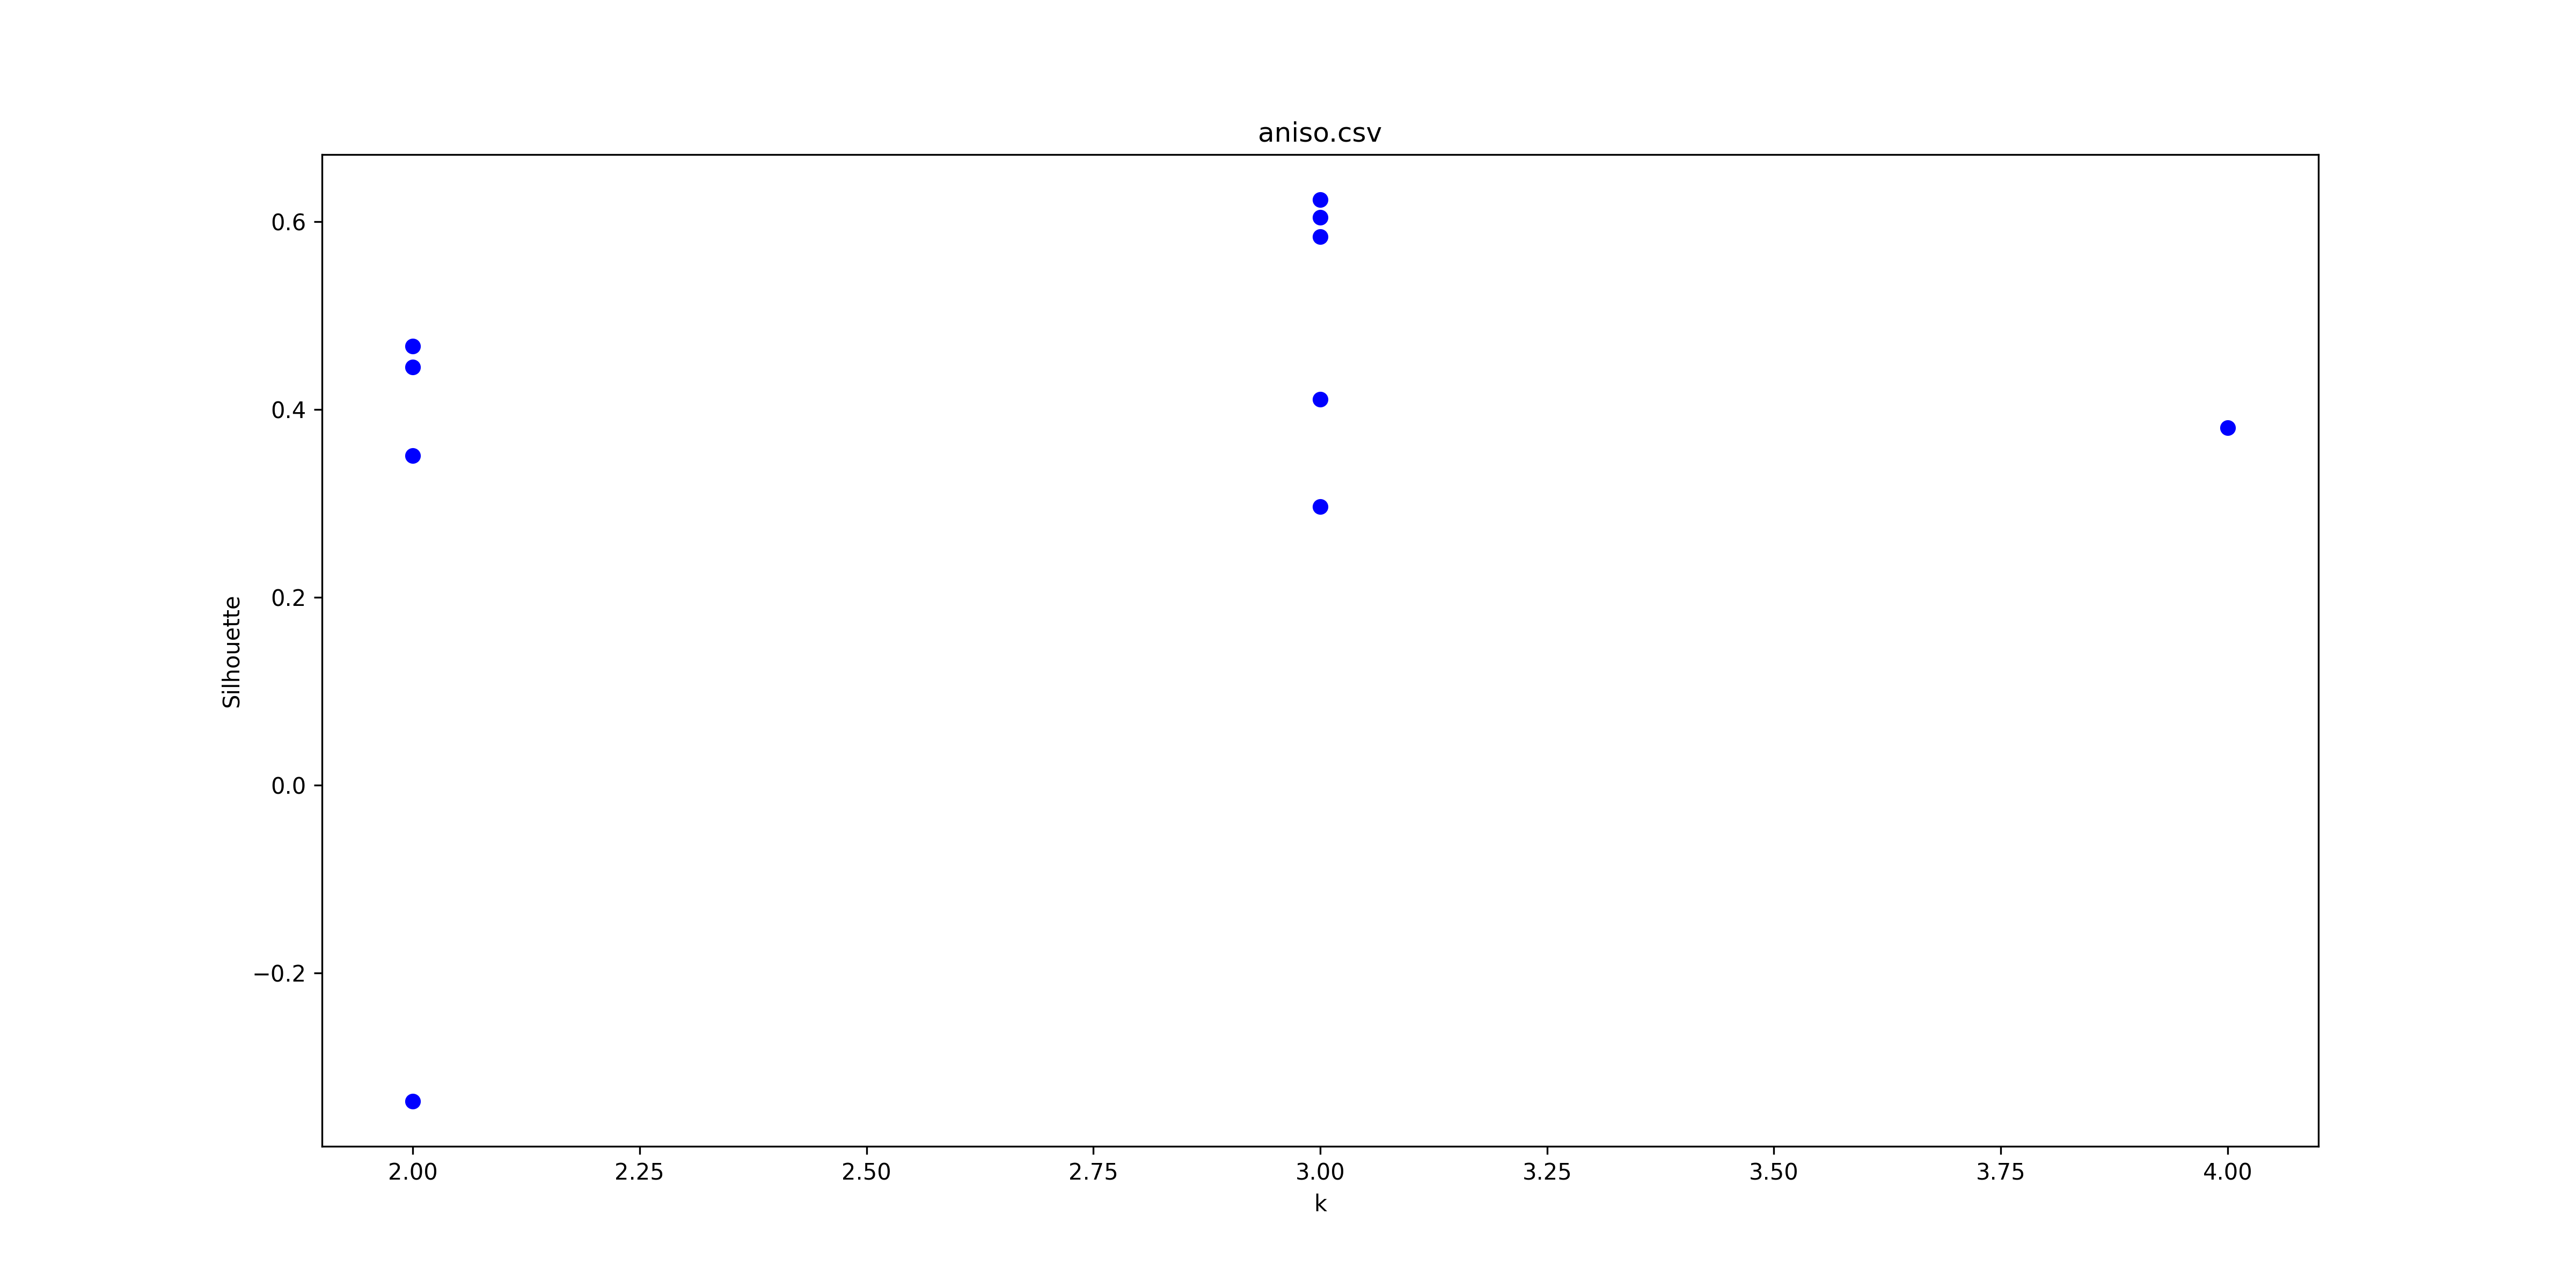

In [89]:
'''Parameter sets for the aniso dataset:'''
dataset_name = 'aniso.csv'
min_points = [12, 24, 48, 96]
epsilons = [0.2, 0.3, 0.5]

# implement the silhouette measure from scratch to evaluate quality of each clustering.

#Create empty lists
s_scores=[]                         # this is to store Silhouette scores
k=[]                                # this is to store the number of clusters
#read date from .csv file
df = pd.read_csv('circles.csv', encoding='utf-8')

#Determine centroids
centers = [[0.5, 2], [-1, -1], [1.5, -1]]
    
#Normalize the values
df = StandardScaler().fit_transform(df)

df = pd.read_csv('aniso.csv', encoding='utf-8')
df, y_true = make_blobs(n_samples=1499, centers=centers,
                cluster_std=0.50, random_state=0)
for epsilon in epsilons:
    for min_point in min_points:
        #Set the model and its parameters
        # generate clustering for epsilon and min_points and visualize
        #Fit the model
        dataset = DBSCAN(eps=epsilon, min_samples=min_point).fit(df)
        
        core_samples = dataset.core_sample_indices_   
        core_samples_mask = np.zeros_like(dataset.labels_,dtype=bool)   
        core_samples_mask[dataset.core_sample_indices_] = True
        
        labels = dataset.labels_
        
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        
        while n_clusters_ >= 2:                                                              # x-axis: k (for k>=2)
             k.append(n_clusters_)                                                           # axis values for the graph
             s_scores.append(metrics.silhouette_score(df, labels, metric='euclidean'))       #Calculate Silhoutte Score and append to a list

             break
        
        

'''Plot the resulting Silhouette scores on a graph'''
plt.figure(figsize=(16,8), dpi=300)
plt.plot(k, s_scores, 'o', color='blue')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title(dataset_name)
plt.show()

<p>The best number of clusters (k) for this plot is 3 </p>

<p>This is because when the number of clusters (k) = 3, the average silhouette is at its maximum. </p>


<p>The Silhouette plot suggests the same (k) because from the plot the maximum average silhouette is when we have 3 as the number of clusters (k)</p>

 <h2>Parameter sets for the moons dataset:</h2>

    •	dataset_name = 'moons.csv'
    •	min_points = [10, 20, 30]
    •	epsilons = [0.07, 0.085, 0.1] 


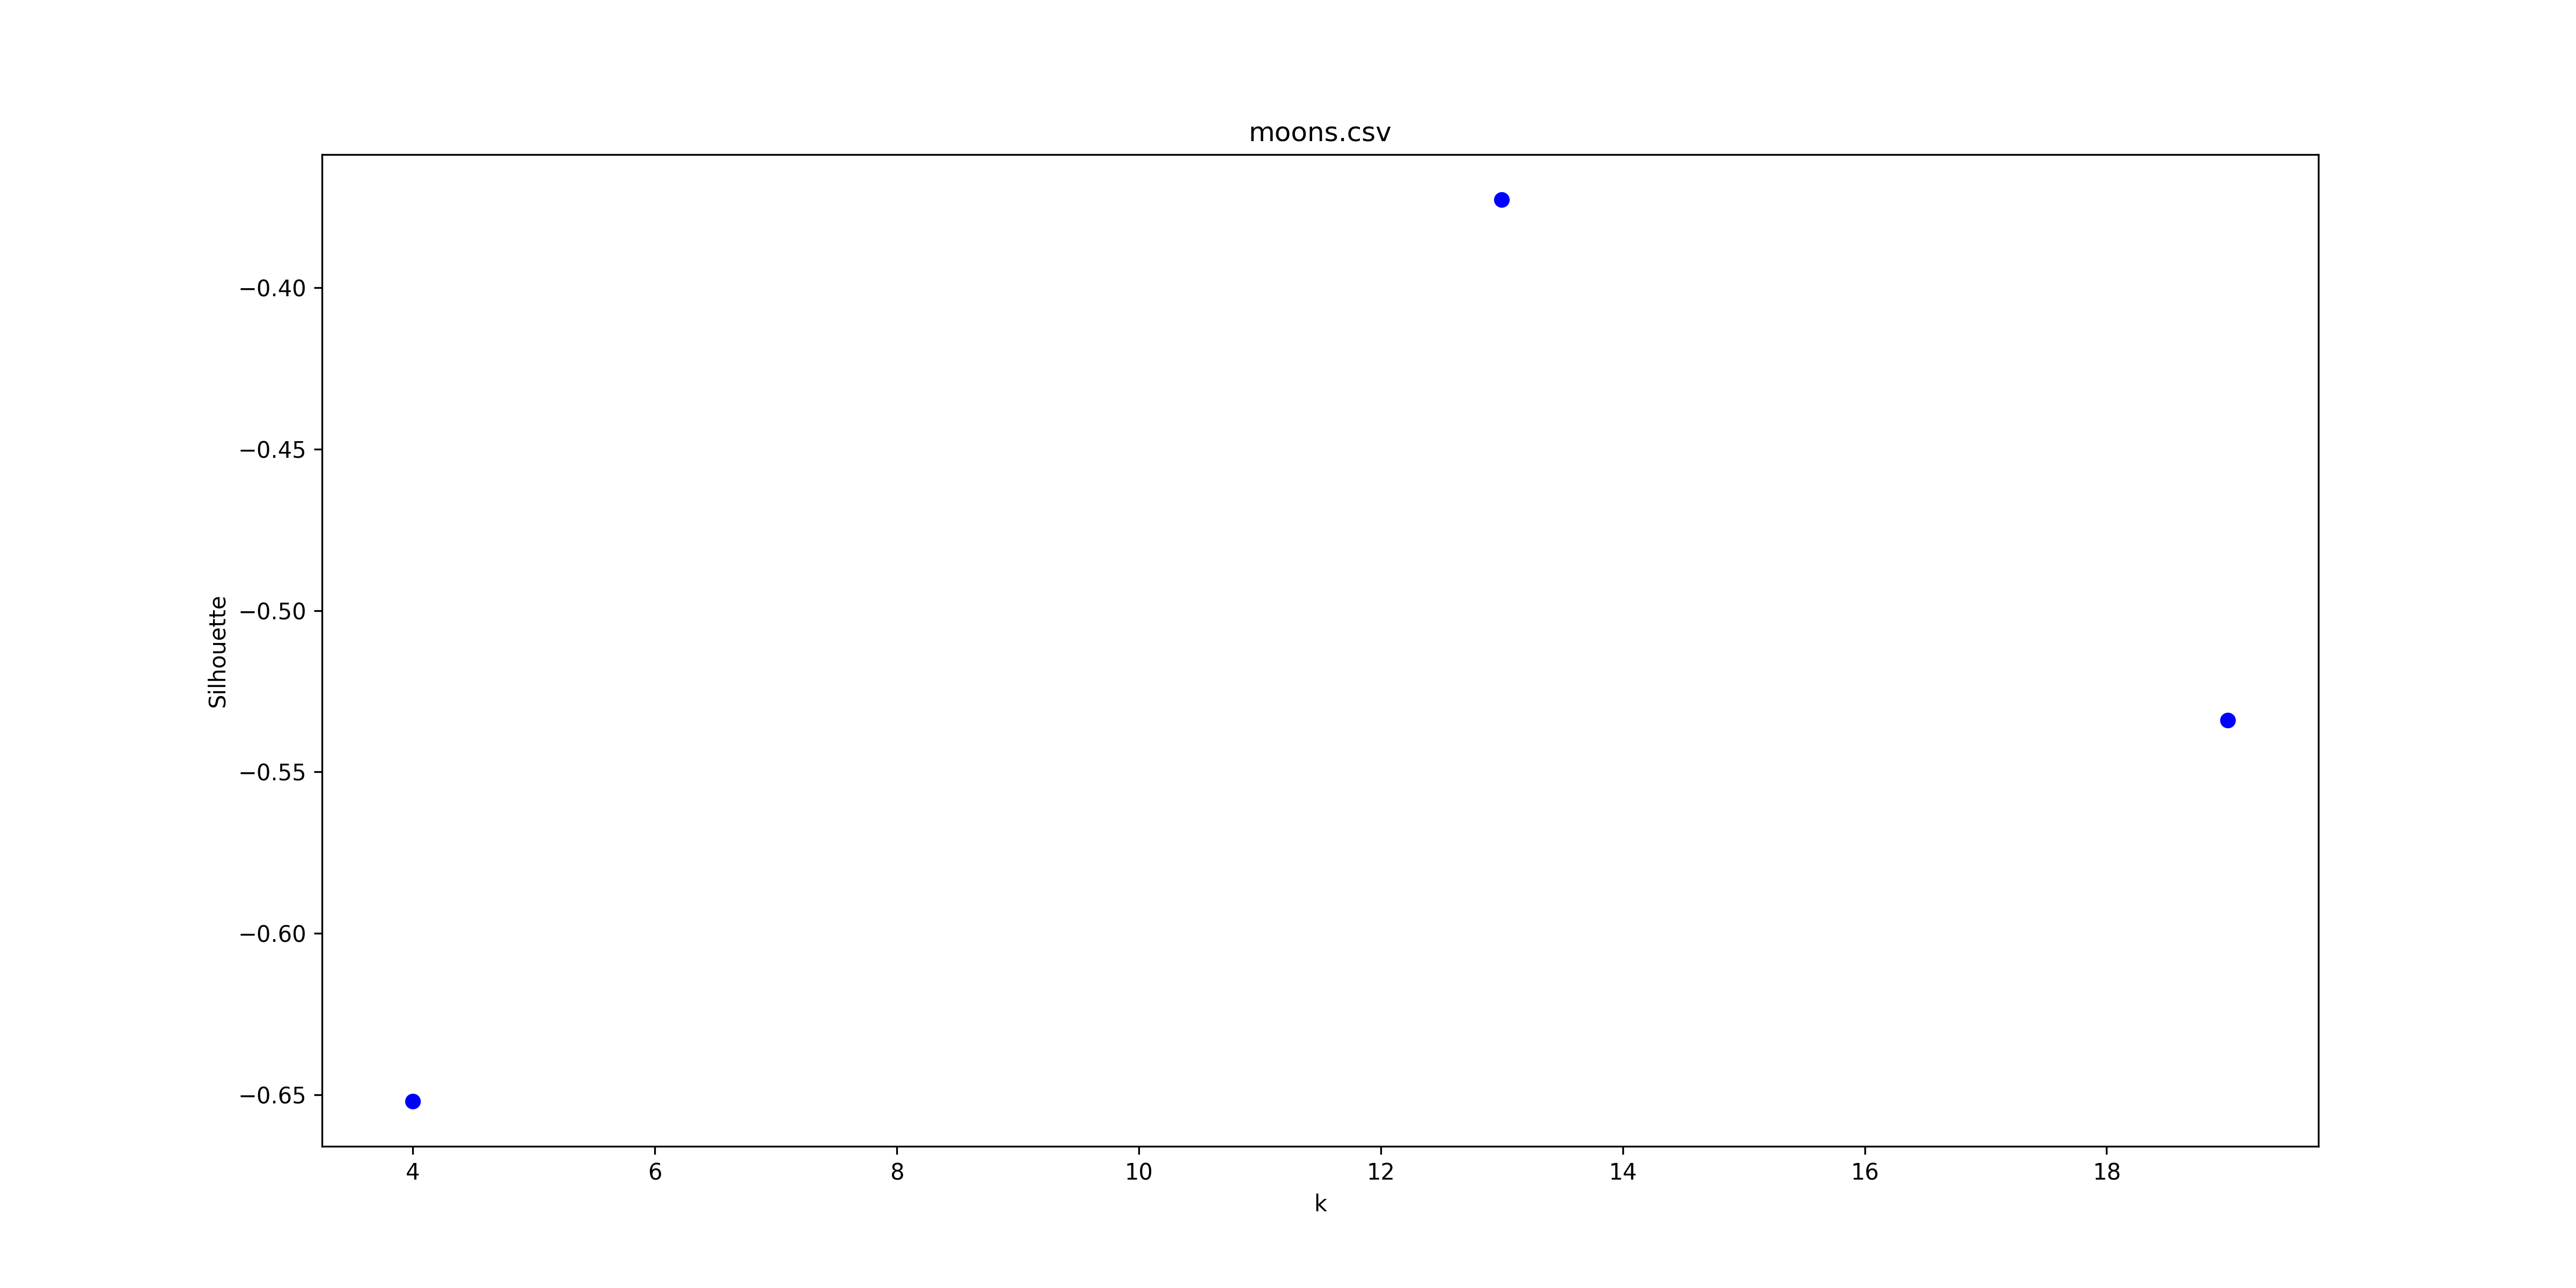

In [90]:

'''Parameter sets for the moons dataset:'''
dataset_name = 'moons.csv'
min_points = [10, 20, 30]
epsilons = [0.07, 0.085, 0.1]

# implement the silhouette measure from scratch to evaluate quality of each clustering.

#Create empty lists
s_scores=[]                         # this is to store Silhouette scores
k=[]                                # this is to store the number of clusters

#read date from .csv file
df = pd.read_csv('circles.csv', encoding='utf-8')

#Determine centroids
centers = [[0.5, 2], [-1, -1], [1.5, -1]]
    
#Normalize the values
df = StandardScaler().fit_transform(df)

df = pd.read_csv('moons.csv', encoding='utf-8')
df, y_true = make_blobs(n_samples=1499, centers=centers,
                cluster_std=0.50, random_state=0)
for epsilon in epsilons:
    for min_point in min_points:
        #Set the model and its parameters
        # generate clustering for epsilon and min_points and visualize
        #Fit the model
        dataset = DBSCAN(eps=epsilon, min_samples=min_point).fit(df)
        
        core_samples = dataset.core_sample_indices_   
        core_samples_mask = np.zeros_like(dataset.labels_,dtype=bool)   
        core_samples_mask[dataset.core_sample_indices_] = True
        
        labels = dataset.labels_
        
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        
        while n_clusters_ >= 2:                                                              # x-axis: k (for k>=2)
             k.append(n_clusters_)                                                           # axis values for the graph
             s_scores.append(metrics.silhouette_score(df, labels, metric='euclidean'))       #Calculate Silhoutte Score and append to a list

             break
        
        

'''Plot the resulting Silhouette scores on a graph'''
plt.figure(figsize=(16,8), dpi=300)
plt.plot(k, s_scores, 'o', color='blue')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title(dataset_name)
plt.show()

<p>The best number of clusters (k) for this plot is 13 </p>

<p>This is because when the number of clusters (k) = 3, the average silhouette is at its maximum. </p>

<p>The Silhouette plot suggests the same (k) because from the plot the maximum average silhouette is when we have 3 as the number of clusters (k)</p>

<h2>Perceptual questions (15 Points)</h2>

<p style="text-align: justify;">1. Why do we use DBScan instead of Kmeans for these datasets?
</p>
<p style="text-align: justify;">2. What is the complexity of the DBScan algorithm?
</p>

<p style="text-align: justify;">3. Can you decide on the existence of outliers based on the Silhouette measures?
</p>


Put your answers here.

<p><strong>1. Answer:</strong></p>
<div style="text-indent: 50px;">
<p>Kmeans works with convex clusters or spherical shaped clusters. it fails when the data is not spherical.</p> 
<p>It is only suitable for closely and neatly packed together clusters, the cluster need to be well seperared.</p>
<p>Kmeans is also affected by noice and outliers in the data. DBScan can identify outliers </P>
</div>

<p><strong>2. Answer:</strong></p>
<div style="text-indent: 50px;">
<p>The complexity is <strong>O(n2)</strong>,</p> 
<p>where n is the number of degrees in the data set.</p> 
</div>

<p><strong>3. Answer:</strong></p>
<div style="text-indent: 50px;">
<p></p> 
<p>Silhouette method gives a Silhouette value which is a measure of how silmilar an object is to its own cluster in relation to other clusters.</p> 
<p>The Silhouette value range is [1, -1].</p> 
<p><strong>The silhouette coeficient of +1 </strong>shows that the sample is far away from the neighbouring clusters.</p> 
<p><strong>The silhouette coeficient of 0 </strong>shows that the sample is on or very close to th decision boundary between two neighbouring clusters.</p> 
<p><strong>The silhouette coeficient of &lt1 </strong>shows that the samples are outliers</p> 

</div>